<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/RNN_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# We download the data
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [3]:
# We load the content of the csv input file into a pandas dataframe
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# We discard the unnecessary columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis =1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# We rename the columns
df.columns = ['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# We map the labels into 0 and 1
df['label_var'] = df['label'].map({'ham': 0, 'spam': 1})
Y = df['label_var'].values

In [7]:
# We perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'],Y,test_size = 0.3)

In [8]:
# We tokenize the text and define the sequences
vocab_size = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
W = len(tokenizer.word_index)
print("the number of unique words is: {}".format(W))

the number of unique words is: 7344


In [9]:
# We implement padding to the training sequences
seq_train_padded = tf.keras.preprocessing.sequence.pad_sequences(seq_train,padding='pre') 
L = seq_train_padded.shape[1]
print('the length of the padded sequences is: {}'.format(L))

the length of the padded sequences is: 189


In [10]:
# We implement padding to the test sequences
seq_test_padded = tf.keras.preprocessing.sequence.pad_sequences(seq_test,maxlen=L,padding='pre')

In [11]:
# We create the model 
D = 20 # this is the embeding dimensionality
M = 15 # this is the number of hidden units
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(L,)),
                                    tf.keras.layers.Embedding(W+1,D),
                                    tf.keras.layers.LSTM(M, return_sequences=True),
                                    tf.keras.layers.GlobalMaxPooling1D(),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
# We compile and fit the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r = model.fit(seq_train_padded,y_train,validation_data=(seq_test_padded,y_test),epochs = 10)

Epoch 1/10
122/122 [==============================] - 5s 38ms/step - loss: 0.4637 - accuracy: 0.8674 - val_loss: 0.3975 - val_accuracy: 0.8624
Epoch 2/10
122/122 [==============================] - 4s 34ms/step - loss: 0.3787 - accuracy: 0.8674 - val_loss: 0.3731 - val_accuracy: 0.8624
Epoch 3/10
122/122 [==============================] - 4s 34ms/step - loss: 0.3167 - accuracy: 0.8674 - val_loss: 0.2850 - val_accuracy: 0.8624
Epoch 4/10
122/122 [==============================] - 4s 34ms/step - loss: 0.1905 - accuracy: 0.9097 - val_loss: 0.1599 - val_accuracy: 0.9659
Epoch 5/10
122/122 [==============================] - 4s 34ms/step - loss: 0.1053 - accuracy: 0.9864 - val_loss: 0.1080 - val_accuracy: 0.9797
Epoch 6/10
122/122 [==============================] - 4s 34ms/step - loss: 0.0655 - accuracy: 0.9915 - val_loss: 0.0832 - val_accuracy: 0.9791
Epoch 7/10
122/122 [==============================] - 4s 34ms/step - loss: 0.0434 - accuracy: 0.9954 - val_loss: 0.0681 - val_accuracy: 0.9827

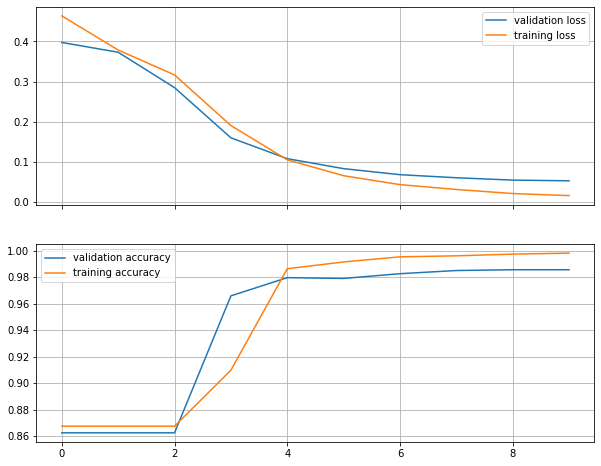

In [13]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()